## Task 3: Unsupervised Learning
K-Means Clustering: A Partitional Clustering Approach

Aim: To create K subgroups of the data

Objective: The sum of the squared distance between the data points and the centroid of the particular cluster is minimum.

In [1]:
# import libraries

import pandas as pd                  # to create python objects as rows and columns 
import numpy as np                   # to create multidimensional array object 
import matplotlib.pyplot as plt      # for plotting
from sklearn import datasets         # to load in-built large datasets
import seaborn as sns
import random
%matplotlib inline


Steps involved in Clustering:

1. Import Data Samples
2. Feature Selection
3. Clustering Algorithm Selection: (K-Means Clustering) 
4. Cluster Validation
5. Conclusion

I. Import Data Samples

In [2]:
# Load the data

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
#pd.options.display.max_rows = None
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


II. Feature Selection

In [18]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values    # Nunerical Data
# considering sepal length, sepal width, petal length, petal width

Text(0, 0.5, 'Sepal Width')

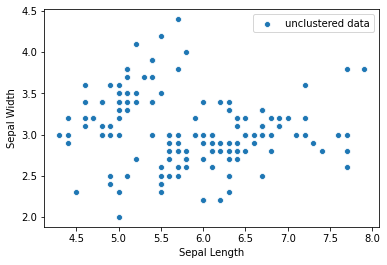

In [4]:
sns.scatterplot(x[:,0],x[:,1],label='unclustered data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

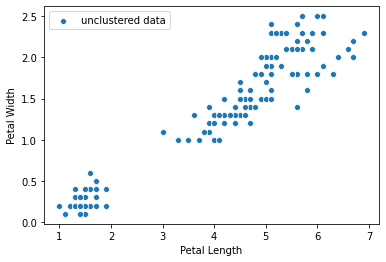

In [5]:
sns.scatterplot(x[:,2],x[:,3],label='unclustered data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [6]:
m=x.shape[0]
n=x.shape[1]
n_iter=50
K=3


In [7]:
centroids=np.array([]).reshape(n,0) 
euclidean_distance=np.array([]).reshape(m,0)
for k in range(K):                        
    centroids=np.c_[centroids,x[random.randint(0,m-1)]]

In [8]:
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(n,0)

III. K-Means Clustering Algorithm

1. Initialize K Cluster Means
2. Assign the elements of x to the nearest cluster based on miinimum eucledian distance.
3. Update the Cluster Mean
4. Repeat Step 2 to 3 until there is no change in mean

In [9]:
for i in range(n_iter):
    euclidean_distance=np.array([]).reshape(m,0)
    for k in range(K):
        dist=np.sum((x-centroids[:,k])**2,axis=1)
        euclidean_distance=np.c_[euclidean_distance,dist]
    C=np.argmin(euclidean_distance,axis=1)+1
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(n,0)
    for k in range(m):
        cent[C[k]]=np.c_[cent[C[k]],x[k]]
    for k in range(K):
        cent[k+1]=cent[k+1].T
    for k in range(K):
        centroids[:,k]=np.mean(cent[k+1],axis=0)
    final=cent

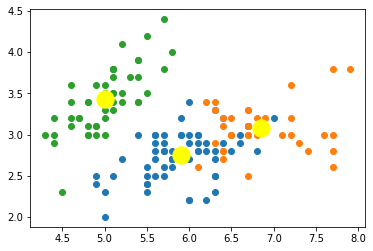

In [10]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
#plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

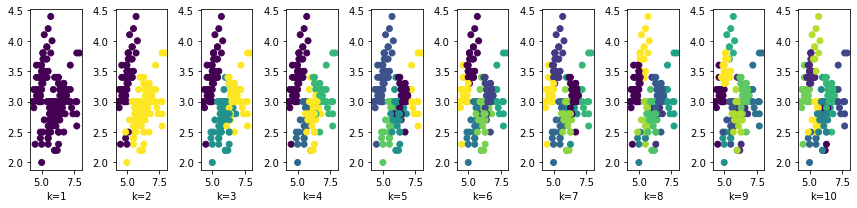

In [11]:
plt.figure(figsize=(12, 3))
from sklearn.cluster import KMeans
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    a = kmeans.fit_predict(x)
    plt.subplot(1,10,k)
    plt.scatter(x[:, 0], x[:, 1], c=a)
    plt.xlabel('k='+str(k))
plt.tight_layout()
plt.show()

IV. Cluster Validation: Elbow method and Silhouette Score

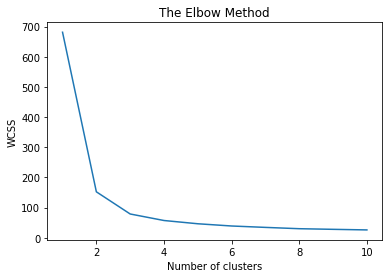

In [20]:
#lets implement the same algorithm using sklearn libraries
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []               # Within- Cluster Sum of squares
for i in range(1, 11):  # Range of K
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x)
   

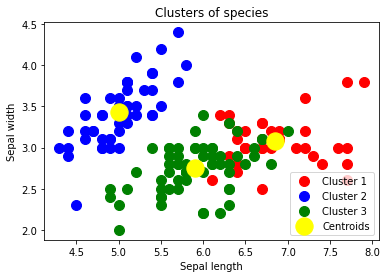

In [14]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of species')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

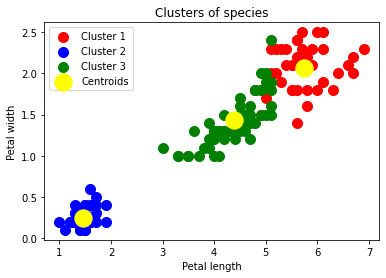

In [15]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of species')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
print(f'Silhouette Score(n=4): {silhouette_score(x, y_kmeans)}')

Silhouette Score(n=4): 0.5528190123564091


V. Conclusion

1. The clusters are not round shaped due to variation in the magnitude of data within clusters.
2. Random initialization of cluster centroids; need to find appropriate no. clusters beforehand.
1. The maximum number of clusters will be equal to no. of data points.
2. Elbow curve method is used to find the optimum no. of clusters.